In [1]:
#Standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#First, we calculate the theoretical capacity given a reaction 
# The reaction is LiCoO2 --> Li+ + e- + CoO2

# 1. What are the molar masses of each element?
#----------------------------------------------------------------
Li = 6.941 #g
Co = 58.933 #g
O = 15.999 #g

# 2. What is the molar mass of the entire lithiated material?
#----------------------------------------------------------------
LCO = Li + Co + 2*O  #molecular mass of LiCoO2 (LCO)

# 3. Apply Faraday's Law to calculate the theoretical capacity:
#----------------------------------------------------------------
n = 1 #There is one e- in the reaction
F = 96485 #C/mol

Q_grav = (n*F/LCO)*(1/3600)*1000 #Faradays law equation, convert  C to mAh

#Displaying answer
print('LiCoO2 theoretical gravimetric capacity: \n')
print(str(round(Q_grav,2)) + ' mAh/g')



LiCoO2 theoretical gravimetric capacity: 

273.84 mAh/g


In [2]:
#Exercise 1: calculate the theoretical capacity of sulfur.
# The reaction is S + 2Li+ + 2e- --> Li2S.

# --------------- Your work here -------------
S = 32.08 #g 


#Displaying answer
print('Li2S theoretical gravimetric capacity: \n')
print(str(round(Q_grav,2)) + ' mAh/g')



Li2S theoretical gravimetric capacity: 

1166.24 mAh/g


In [3]:
# What if you only consider the sulfur?
Q_grav_lowball = (n*F/S)*(1/3600)*1000  

print('Li2S theoretical gravimetric capacity, ignoring Li: \n')
print(str(round(Q_grav_lowball,2)) + ' mAh/g')

# This is the number you will see quoted in reviews

Li2S theoretical gravimetric capacity, ignoring Li: 

1670.91 mAh/g


In [4]:
# Now we will work with some well-known Li-ion materials. 
# We will also learn a little bit about the pandas library of python.
# Pandas is a database library often used in data science. 
df = pd.read_csv('activesDB.csv')
df.shape

(9, 9)

In [5]:
#Exercise: add a row to the column - let's say sulfur
newrow={'name': 'S', 'name_long':'sulfur','formula': 'S', 'type':'positive', 
        'cap':600,'V':2.15, 'n':2, 'density':1.96, 'theorycap':1671}
#df.append(newrow, ignore_index = True)
df.loc[len(df.index)] = newrow
df.shape

(10, 9)

In [6]:
# We can use some dataframe tools to sort and filter the database
df[df.type=='positive']

,name,name_long,formula,type,cap,V,n,density,theorycap
0,NCA,lithium nickel cobalt aluminium oxide,Li(Ni0.8Co0.15Al0.05)O2,positive,210,3.860,1,4.85,279
1,LCO,lithium cobalt oxide,LiCoO2,positive,165,3.860,1,5.10,274
2,LFP,lithium iron phosphate,LiFePO4,positive,160,3.375,1,3.60,170
3,NMC622,lithium nickel manganese cobalt oxide,Li(Ni0.6Mn0.2Co0.2)O2,positive,181,3.860,1,4.70,277
4,NMC811,lithium nickel manganese cobalt oxide,Li(Ni0.8Mn0.1Co0.1)O2,positive,195,3.860,1,4.70,276
9,S,sulfur,S,positive,600,2.150,2,1.96,1671


In [7]:
# We can copy over select columns into a new database for comparing theoretical and reversible capacities.
compdf = df[['name','cap','theorycap','n']]
compdf

,name,cap,theorycap,n
0,NCA,210,279,1
1,LCO,165,274,1
2,LFP,160,170,1
3,NMC622,181,277,1
4,NMC811,195,276,1
5,LTO,167,186,3
6,Gr,344,372,1
7,Li,3861,3861,1
8,Si,2200,3817,4
9,S,600,1671,2


In [8]:
compdf['ratio'] = compdf['cap']/compdf['theorycap']
compdf

<ipython-input-8-ad6937a53551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compdf['ratio'] = compdf['cap']/compdf['theorycap']


,name,cap,theorycap,n,ratio
0,NCA,210,279,1,0.752688
1,LCO,165,274,1,0.602190
2,LFP,160,170,1,0.941176
3,NMC622,181,277,1,0.653430
4,NMC811,195,276,1,0.706522
5,LTO,167,186,3,0.897849
6,Gr,344,372,1,0.924731
7,Li,3861,3861,1,1.000000
8,Si,2200,3817,4,0.576369
9,S,600,1671,2,0.359066


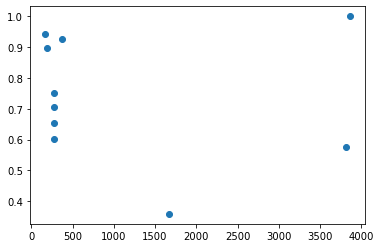

In [9]:
plt.plot(compdf['theorycap'],compdf['ratio'],'o')

In [10]:
# Now we want to use the ratio of theoretical and reversible capacity to calculate x and y.
# x and y represent the reaction stoichiometry of Li present in the active mat.
# x and y are two of the variables calculated by  Pybamm simulations.
# In the negative electrode), we use x to represent the reacted stoichiometry of Li. 
# Negatives start out delithiated (x = 0). Therefore xmax = n*ratio.
# In the positive electrode), we use y.
# Positives start out lithiated (y=n). Therefore ymax = n and ymin = n*(1-ratio)
# It's important to recognize that we can't take all the Li out of cathodes. 
# This is why ymin almost never goes to zero.

# Need to figure out the datafram logic here to fill irrelevant cells w NaN
# for length of df, if type ==negative, xmax. ymax=NaN. else ymax, xmax=NaN (default positive). 
compdf['xmax'] = compdf['n']*compdf['ratio']
compdf['ymin'] = (1-compdf['n']*compdf['ratio'])
compdf

<ipython-input-10-6596c53cf04f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compdf['xmax'] = compdf['n']*compdf['ratio']
<ipython-input-10-6596c53cf04f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compdf['ymin'] = (1-compdf['n']*compdf['ratio'])


,name,cap,theorycap,n,ratio,xmax,ymin
0,NCA,210,279,1,0.752688,0.752688,0.247312
1,LCO,165,274,1,0.602190,0.602190,0.397810
2,LFP,160,170,1,0.941176,0.941176,0.058824
3,NMC622,181,277,1,0.653430,0.653430,0.346570
4,NMC811,195,276,1,0.706522,0.706522,0.293478
5,LTO,167,186,3,0.897849,2.693548,-1.693548
6,Gr,344,372,1,0.924731,0.924731,0.075269
7,Li,3861,3861,1,1.000000,1.000000,0.000000
8,Si,2200,3817,4,0.576369,2.305476,-1.305476
9,S,600,1671,2,0.359066,0.718133,0.281867


In [11]:
# Now learn some syntax
df.loc[df['name']=='LTO']['cap'].values[0]
# the .loc function returns a df of the whole row. the ['cap'] calls the row index and column with label and dtype. 
# .values keeps only the cell value and dtype, not the row index. [0] keeps only the value.  


167

In [12]:
# Now it's time to go from the material level to the cell-stack level. 
# First, we have to consider the active-material only Li balance.
# This is the best-case perfect impossible scenario, with zero electrolyte or packaging.

def masscap_actives(posmat,negmat):
    # Lookup the reversible/theoretical capacity values
    revcap_pos=df.loc[df['name']==posmat]['cap'].values[0]
    revcap_neg=df.loc[df['name']==negmat]['cap'].values[0]

    # For 1g basis, we have revcap_cath mAh of charge, say 170 mAh
    mass_neg = revcap_pos/revcap_neg  # 170 mAh/(360 mAh/g) = g
    total_mass = 1 + mass_neg
    return revcap_pos/total_mass


In [13]:
#Exercise: What is the active-material only gravimetric capacity of the followng?

# Will have to redo this with string arguments instead of values
# Note that this is reversible capacity, not theoretical capacity. 

# a: NCA positive / graphite negative (the chemistry in Tesla cars)
print("NCA/graphite: "+str(round(masscap_actives('NCA','Gr'),2)) +' mAh/g')
# b: NCA positive / Li negative
print("NCA/Li: "+str(round(masscap_actives('NCA','Li'),2)) +' mAh/g')

# c: Sulfur positive / graphite negative
print("Sulfur/graphite: "+str(round(masscap_actives('S','Gr'),2)) +' mAh/g')

# d: Sulfur positive / Li negative
print("Sulfur/Li: "+str(round(masscap_actives('S','Li'),2)) +' mAh/g')


NCA/graphite: 130.4 mAh/g
NCA/Li: 199.17 mAh/g
Sulfur/graphite: 218.64 mAh/g
Sulfur/Li: 519.3 mAh/g


In [14]:
# Next exercise: use difference between negative/positive voltages to calculate energy.

def energy_actives(posmat,negmat):
    V_pos=df.loc[df['name']==posmat]['V'].values[0]
    V_neg=df.loc[df['name']==negmat]['V'].values[0]
    # Cell V =  Vpos - Vneg. Capacity in mAh/g. 1 A*V = 1W so mAh*V = mW 
    energy = (V_pos-V_neg)*masscap_actives(posmat,negmat) #mWh/g -> Wh/kg
    return energy

energy_actives('S','Li')
# a: NCA positive / graphite negative (the chemistry in Tesla cars) 
# b: NCA positive / Li negative 
# c: Sulfur positive / graphite negative 
# d: Sulfur positive / Li negative 

1116.4963012777405

In [15]:
# Now we need to consider the other components in the cell stack.
# Because of the inactive layers (CC, sep) a thicker electrode is more economic.
# We are basing our model on Obrovac et al.
# BotB does a nice job explaining as well; you are encouraged to explore their
# more advanced functions which include automatic conversion between 
# mass loading, area loading, and thickness

# First, we set the porosity of the anode and positive. 
# The electrodes need void fraction (porosity) to let Li+ ions move around in liquid phase.
# We use the symbol epsilon for porosity

eps_pos = 0.2

# We also want the mass fraction of active material. 
# An optimized industrial electrode may include 98% active material.
# We will assume that the inactive components are equal fractions carbon/binder.
active_mf_pos = 0.98
binder_mf_pos, carbon_mf_pos = (1-active_mf_pos)/2, (1-active_mf_pos)/2

# For this exercise, we will assume the positive/negative have the same formulatino.
eps_neg, active_mf_neg, binder_mf_neg, carbon_mf_neg = eps_pos, active_mf_pos, binder_mf_pos, carbon_mf_pos 

# Now the densities of the carbon and binder - database lookup later
binder_density = 1.78 # g/cm3 if PVDF
carbon_density = 1.8 # g/cm3 if carbon black

In [27]:
# Overall flow: find effective mAh/cm3 of cathode given formulation/eps
# match thickness of anode, considering eps_neg, thick_pos, vcap_pos
# calculate gravimetric and volumetric cap of sandwich

# First, we need to compute the effective mAh/cm3 of the positive electrode.
# We could use negative electrode as basis, but positive is more common.

def vol_fracs(material,active_mf, binder_mf, carbon_mf,porosity):
    # Lookup rev cap, density
    revcap=df.loc[df['name']==material]['cap'].values[0]
    active_density=df.loc[df['name']==material]['density'].values[0]
    
    # Check this formula - is it correct?
    avg_vol = active_mf/active_density + binder_mf/binder_density + carbon_mf/carbon_density 
    print('avg vol',avg_vol)
    avg_dens =  active_mf*active_density + binder_mf*binder_density + carbon_mf*carbon_density
    print('avg dens',avg_dens)
    active_vf = (1-porosity)*(active_mf/active_density)/avg_vol
    binder_vf = (1-porosity)*(binder_mf/binder_density)/avg_vol # don't actually need
    carbon_vf = (1-porosity)*(carbon_mf/carbon_density)/avg_vol # don't actually need
    
    vol_cap = active_vf*revcap*active_density # cm3/cm3 * mAh/g * g/cm3 = mAh/cm3
    
    print('Vol fracs of active/binder/carbon: '+str(round(active_vf,3)) + '/'+
          str(round(binder_vf,3))+'/'+str(round(carbon_vf,3)))
    print('Vol frac of electrolyte: ',porosity)
    return vol_cap, avg_dens

vcap_pos, dens_pos = vol_fracs('NCA',active_mf_pos, binder_mf_pos, carbon_mf_pos,eps_pos)  # make this a lookup
vcap_neg, dens_neg = vol_fracs('Gr',active_mf_neg, binder_mf_neg, carbon_mf_neg,eps_neg)  # make this a lookup

avg vol 0.21323538875374856
avg dens 4.788799999999999
Vol fracs of active/binder/carbon: 0.758/0.021/0.021
Vol frac of electrolyte:  0.2
avg vol 0.4486735330836454
avg dens 2.231
Vol fracs of active/binder/carbon: 0.78/0.01/0.01
Vol frac of electrolyte:  0.2


In [32]:
# Next, we are going to balance the negative and positive electrodes
# Batteries include an excess ratio of negative material to avoid Li plating
# This could be anywhere from 5 to 15% 
NP=1.1  # 10% excess
w_pos = 60 # positive electrode thickness in um. 1 um = 0.0001 cm
w_pos = w_pos*(1e-4)

def match_wneg(w_pos,NP,vc_pos,vc_neg):
    total_cap = w_pos*vc_pos  #cm * mAh/cm3 = mAh/cm2
    w_neg = total_cap/vc_neg*NP # mAh/cm2/(mAh/cm3)* ratio = cm
    return w_neg
w_neg= match_wneg(w_pos,NP,vcap_pos,vcap_neg)
print('negative thickness:',w_neg*1e4,'um')

# Finally calculate the total gravimetric/volumetric cap of the cell stack.
w_sep, w_ccp, w_ccn = 20/1e4, 16/1e4, 12/1e4 # microns -> cm
eps_sep = 0.35

def total_vcap(w_pos,w_neg):
    totalw= 2*(w_pos+w_neg+w_sep) + w_ccn + w_ccp  # in cm
    print('total thickness:',totalw*1e4,' um')
    return w_pos*vcap_pos/totalw


def total_gcap(w_pos,w_neg):
    elyte_dens = 1.2 #g/cm3
    al_dens = 2.24 #g/cm3
    cu_dens = 8.96 #g/cm3
    sep_dens = 0.9 # g/cm3
    
    elyte = (w_pos*eps_pos+w_neg*eps_neg+w_sep*eps_sep)*elyte_dens #g/cm2
    
    totalmass= 2*(w_pos*dens_pos+w_neg*dens_neg+w_sep*sep_dens+elyte) + w_ccn*cu_dens + w_ccp*al_dens  # g/cm2
    print('total mass:',totalmass,' g/cm2')
    return w_pos*vcap_pos/totalmass


print(total_vcap(w_pos,w_neg), 'mAh/cm3')
print(total_gcap(w_pos,w_neg),'mAh/g of stack')
#def cell_stack_cap():
    # copper is universal negative CC; 8 um thick, 8.96 g/cm3
    # Al is universal positive CC; 15 um thick, 2.24 g/cm3
    # separator is 16 um thick, porosity of 0.35, 0.9 g/cm3
    # electrolyte is 1.2 g/cm3, takes up void volume in composites and sep

    

negative thickness: 84.77659257986848 um
total thickness: 357.55318515973687  um
129.56469419894285 mAh/cm3
total mass: 0.12185819205297099  g/cm2
38.0165406318695 mAh/g of stack


In [34]:
# Still to do - write a loop that plots the energy density of various chemistries as a function of cathode thickness.
# The lesson you are supposed to learn is that thicker electrodes improve energy density and that making a thicker 
# positive eletrode could be more feasible than implementing some crazy new chemistry. 

# To make this happen, might need to restructure  the functions. Definitely need to call them again.  

140.22